In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import scipy.sparse as sp

In [2]:

from scipy.sparse import issparse

class Logistic_Regression:
    def __init__(self, learning_rate=0.01, iterations=100, batch_size=32):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.batch_size = batch_size

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.iterations):
            # Shuffle the data and split into mini-batches
            indices = np.random.permutation(self.m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, self.m, self.batch_size):
                # Select mini-batch
                X_mini_batch = X_shuffled[i:i+self.batch_size]
                y_mini_batch = y_shuffled[i:i+self.batch_size]

                # Linear combination of input features and weights
                z = X_mini_batch.dot(self.weights) + self.bias

                # Apply sigmoid function
                predictions = self.sigmoid(z)

                # Update weights and bias using gradient descent
                error = y_mini_batch - predictions
                gradient_weights = X_mini_batch.T.dot(error) / self.batch_size
                gradient_bias = np.sum(error) / self.batch_size
                if issparse(X_mini_batch):
                    self.weights = self.weights + self.learning_rate * gradient_weights.flatten()
                else:
                    self.weights = (self.weights + self.learning_rate * gradient_weights).astype(float)
                    self.bias += self.learning_rate * gradient_bias
    
    def sigmoid(self, z):
        if issparse(z):
            # If input is a sparse matrix, apply sigmoid element-wise
            return 1 / (1 + np.exp(-z.A))
        else:
            # If input is a dense array, use the original implementation
            return 1 / (1 + np.exp(-z))
    def predict(self, X):
        z = X.dot(self.weights) + self.bias
        return np.round(self.sigmoid(z)).astype(int)


In [3]:
import pandas as pd
true_data = pd.read_csv('processedTrue.csv')
fake_data = pd.read_csv('processedFake.csv')
data = pd.concat([true_data, fake_data], ignore_index=True, sort=False)
data.rename (columns= {0: 'index'}, inplace=True)
data.columns = ['index', 'label', 'content']


In [4]:
data.head()

,index,label,content
0,0,0,u budget fight loom republicans flip fiscal sc...
1,1,0,u military accept transgender recruit monday p...
2,2,0,senior u republican senator let mr mueller job...
3,3,0,fbi russia probe help australian diplomat tip ...
4,4,0,trump want postal service charge much amazon s...


In [5]:
data.isnull().sum()

index      0
label      0
content    0
dtype: int64

In [6]:
X = data['content']
y = data['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [8]:
#Using Vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
X_train=tfidf_vectorizer.fit_transform(X_train) 
X_test=tfidf_vectorizer.transform(X_test)

Logistic Regression

In [9]:
model=Logistic_Regression()

In [10]:
X_train_sparse = csr_matrix(X_train)

In [11]:
# Initialize logistic regression model
model = Logistic_Regression(learning_rate=0.01, iterations=100, batch_size=32)


In [12]:

# Convert y to a NumPy array
y_train_array = y_train.to_numpy()

# Train the model using mini-batch training
model.fit(X_train, y_train_array)

In [13]:
# Predict on the test set
X_test_sparse = csr_matrix(X_test)
y_pred = model.predict(X_test_sparse)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)




Accuracy: 0.9403966131907309


In [14]:
# Predict on the training set
X_train_prediction = model.predict(X_train_sparse)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, X_train_prediction)
print('Training Accuracy:', training_accuracy)

# Predict on the test set
X_test_prediction = model.predict(X_test_sparse)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, X_test_prediction)
print('Testing Accuracy:', testing_accuracy)

# Print additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy: 0.9383025542463999
Testing Accuracy: 0.9403966131907309
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4327
           1       0.94      0.94      0.94      4649

    accuracy                           0.94      8976
   macro avg       0.94      0.94      0.94      8976
weighted avg       0.94      0.94      0.94      8976

Confusion Matrix:
 [[4069  258]
 [ 277 4372]]


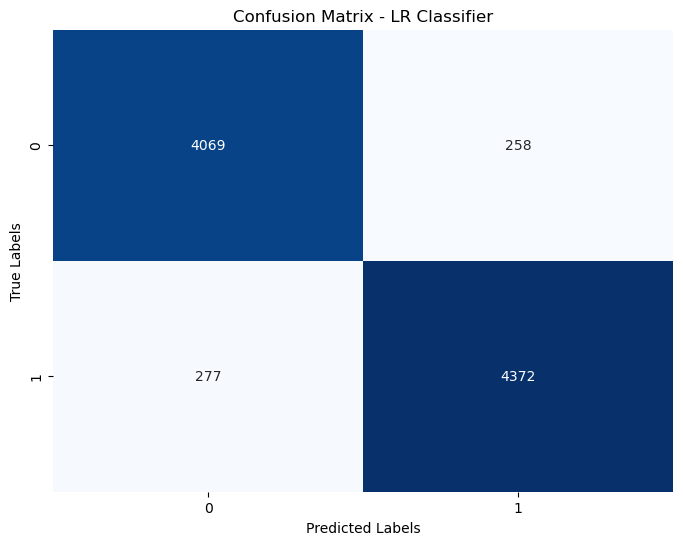

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - LR Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()